<a href="https://colab.research.google.com/github/Anand-s-cmd/ML_Use_cases/blob/main/Hospital_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import pandas as pd
import pandas as pd
#Univariate Analysis
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [57]:
pd.pandas.set_option('display.max_columns',None)

In [58]:
dataset=pd.read_csv('/content/drive/MyDrive/Hospital/Dataset.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(91713, 186)


In [59]:
## print the top5 records
dataset.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [60]:
df=dataset

In [61]:
df3=df

In [62]:
df3.shape

(91713, 186)

In [63]:
#Lets drop Id's
df3.drop('encounter_id',inplace=True,axis=1)
df3.drop('patient_id',inplace=True,axis=1)
df3.drop('hospital_id',inplace=True,axis=1)

In [64]:
df3.shape

(91713, 183)

In [65]:
df3.columns# just check hospital_death columns 

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity',
       'gender', 'height', 'hospital_admit_source', 'icu_admit_source',
       'icu_id',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=183)

In [66]:
features_with_na=[features for features in df3.columns if df3[features].isnull().sum()>1]

In [67]:
for feature in features_with_na:
    print(feature, np.round(df3[feature].isnull().mean()*100, 4),'%')

age 4.61 %
bmi 3.7388 %
ethnicity 1.521 %
gender 0.0273 %
height 1.4545 %
hospital_admit_source 23.3435 %
icu_admit_source 0.1221 %
weight 2.9658 %
albumin_apache 59.2926 %
apache_2_diagnosis 1.8122 %
apache_3j_diagnosis 1.2005 %
arf_apache 0.7796 %
bilirubin_apache 63.3869 %
bun_apache 21.0025 %
creatinine_apache 20.5565 %
fio2_apache 77.2715 %
gcs_eyes_apache 2.0728 %
gcs_motor_apache 2.0728 %
gcs_unable_apache 1.1307 %
gcs_verbal_apache 2.0728 %
glucose_apache 12.0332 %
heart_rate_apache 0.9573 %
hematocrit_apache 21.6741 %
intubated_apache 0.7796 %
map_apache 1.0838 %
paco2_apache 77.2715 %
paco2_for_ph_apache 77.2715 %
pao2_apache 77.2715 %
ph_apache 77.2715 %
resprate_apache 1.3455 %
sodium_apache 20.2807 %
temp_apache 4.4792 %
urineoutput_apache 53.4254 %
ventilated_apache 0.7796 %
wbc_apache 24.001 %
d1_diasbp_invasive_max 74.1269 %
d1_diasbp_invasive_min 74.1269 %
d1_diasbp_max 0.1799 %
d1_diasbp_min 0.1799 %
d1_diasbp_noninvasive_max 1.134 %
d1_diasbp_noninvasive_min 1.134 %


##Missing value analysis 

In [68]:
# List of normalized Missing values 
#Step 1 Count missing values 
def missing_values_table(df):
        #Extract columns names first
        column=df3.columns

        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Take the data types
        data_type = df.dtypes

        #Check all the values are having which DATA TYPES
        print(type(column), len(column))
        print(type(mis_val), len(mis_val))
        print(type(mis_val_percent), len(mis_val_percent))
        print(type(data_type), len(data_type))

        #(columns) is <class 'pandas.core.indexes.base.Index'> so we should convert it to Series using [idx.to_series()] method
        column1=column.to_series()

        print("After converting columns to series",type(column1))

        
        # Make a table with the results
        mis_val_table = pd.concat([column1, mis_val, mis_val_percent,data_type], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'column1', 1 : 'Missing Values', 2 : '% of Total Values',3:'Data_Types'})
        
        # Sort the table by percentage of missing descending
        #mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        #
        # WE SHOULD USE THIS CODE mis_val_table_ren_columns.iloc[:,1] != 0] BECAUSE THERE ARE FEW COLUMNS WHICH DOES NOT HAVE ANY SINGLE 0 VALUES
        # IF WE USE THIS CODE THEN THEY GET DROPPED SO BETTER WILL AVOID THIS CODE
        #
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [69]:
missing_values_table(df3)

<class 'pandas.core.indexes.base.Index'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
After converting columns to series <class 'pandas.core.series.Series'>
Your selected dataframe has 183 columns.
There are 183 columns that have missing values.


,column1,Missing Values,% of Total Values,Data_Types
h1_bilirubin_min,h1_bilirubin_min,84619,92.3,float64
h1_bilirubin_max,h1_bilirubin_max,84619,92.3,float64
h1_lactate_min,h1_lactate_min,84369,92.0,float64
h1_lactate_max,h1_lactate_max,84369,92.0,float64
h1_albumin_max,h1_albumin_max,83824,91.4,float64
h1_albumin_min,h1_albumin_min,83824,91.4,float64
h1_pao2fio2ratio_min,h1_pao2fio2ratio_min,80195,87.4,float64
h1_pao2fio2ratio_max,h1_pao2fio2ratio_max,80195,87.4,float64
h1_arterial_ph_min,h1_arterial_ph_min,76424,83.3,float64
h1_arterial_ph_max,h1_arterial_ph_max,76424,83.3,float64


In [70]:
df_missing= missing_values_table(df3)

<class 'pandas.core.indexes.base.Index'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
After converting columns to series <class 'pandas.core.series.Series'>
Your selected dataframe has 183 columns.
There are 183 columns that have missing values.


In [71]:
type(df_missing)

pandas.core.frame.DataFrame

In [72]:
df_missing.head(2)

,column1,Missing Values,% of Total Values,Data_Types
h1_bilirubin_min,h1_bilirubin_min,84619,92.3,float64
h1_bilirubin_max,h1_bilirubin_max,84619,92.3,float64


In [73]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, h1_bilirubin_min to hospital_death
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column1            183 non-null    object 
 1   Missing Values     183 non-null    int64  
 2   % of Total Values  183 non-null    float64
 3   Data_Types         183 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.1+ KB


In [74]:
df_missing['Missing Values']=df_missing['Missing Values'].astype(int)
df_missing['% of Total Values']=df_missing['% of Total Values'].astype(int)

In [75]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, h1_bilirubin_min to hospital_death
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   column1            183 non-null    object
 1   Missing Values     183 non-null    int64 
 2   % of Total Values  183 non-null    int64 
 3   Data_Types         183 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


##Now we have list of columns which have descending order missing values % so start dropping those

In [76]:
#df_filtered = df[df['Age'] >= 25]
#print(df_filtered.head(15)
# Print the shape of the dataframe
#print(df_filtered.shape)

df_missing.drop(df_missing[df_missing['% of Total Values'] >= 80].index, inplace = True)

In [77]:
df_missing.shape

(149, 4)

In [78]:
df_missing.head()

,column1,Missing Values,% of Total Values,Data_Types
h1_hemaglobin_max,h1_hemaglobin_max,73123,79,float64
h1_hemaglobin_min,h1_hemaglobin_min,73123,79,float64
h1_sodium_min,h1_sodium_min,72617,79,float64
h1_sodium_max,h1_sodium_max,72617,79,float64
h1_potassium_min,h1_potassium_min,72102,78,float64


In [79]:
df_missing.tail()

,column1,Missing Values,% of Total Values,Data_Types
icu_stay_type,icu_stay_type,0,0,object
icu_type,icu_type,0,0,object
readmission_status,readmission_status,0,0,int64
apache_post_operative,apache_post_operative,0,0,int64
hospital_death,hospital_death,0,0,int64


In [80]:
#reset the index
df_missing=df_missing.reset_index(drop=True)

In [81]:
df_missing.head()

,column1,Missing Values,% of Total Values,Data_Types
0,h1_hemaglobin_max,73123,79,float64
1,h1_hemaglobin_min,73123,79,float64
2,h1_sodium_min,72617,79,float64
3,h1_sodium_max,72617,79,float64
4,h1_potassium_min,72102,78,float64


In [82]:
df_missing['column1'].values

array(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max',
       'fio2_apache', 'ph_apache', 'paco2_apache', 'pao2_apache',
       'paco2_for_ph_apache', 'd1_lactate_max', 'd1_lactate_min',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_sysbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_pao2fio2ratio_min', 'd1_pao2fio2ratio_max',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_pco2_min',
       'd1_arterial_pco2_max', 'd1_arterial_po2_min',
       'd1_arterial_po2_max', 'bilirubin_apache', 'h1_inr_min',
       'h1_inr_max', 'd1_inr_max', 'd1_inr_min', 'albumin_apache',
       'd1_bilirubin_max', 'd1_bilirubin_min', 'h1_glucose_max',
       'h1_glucose_min', 'd1_albumin_min', 'd1_albumin_max',
       'urineoutput_apache', 'wbc_apache', 'h1_temp_min', 'h1_temp_max',
       'hospital_admit_source', 'hematocrit_apache', 'b

In [83]:
len(df_missing['column1'].values)

149

## considering the "mis_val_table_ren_columns" dataframe's first column that is COLUMNS 
#because after deleting all the values which are having more than 80% missing values now we should only consider 
# the columns that is dataframes columns list in the list values so we can take these columns list in df3 dataframe


In [84]:
after_removed_column_list=df_missing['column1'].values

In [85]:
type(after_removed_column_list)

numpy.ndarray

In [86]:
df4=df

In [87]:
df4[after_removed_column_list].head()

,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hospital_admit_source,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_3j_bodysystem,apache_2_bodysystem,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,ethnicity,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,icu_admit_source,gender,elective_surgery,pre_icu_los_days,icu_id,icu_stay_type,icu_type,readmission_status,apache_post_operative,hospital_death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.0,46.0,32.0,64.0,122.0,66.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,2.3,0.4,0.4,NaN,NaN,2.3,2.3,NaN,14.1,37.5,39.5,Floor,27.4,31.0,2.51,134.0,19.0,15.0,233.0,233.0,14.1,14.1,7.4,8.5,8.9,8.9,27.4,27.4,168.0,30.0,31.0,134.0,136.0,2.51,2.23,3.4,4.0,86.0,85.0,0.05,0.10,68.0,63.0,131.0,115.0,109.0,168.0,85.0,86.0,18.0,26.0,68.0,74.0,100.0,39.3,63.0,68.0,115.0,131.0,22.73,108.0,119.0,73.9,37.2,39.9,4.0,6.0,3.0,Sepsis,Cardiovascular,113.0,46.0,89.0,Caucasian,180.3,36.0,502.01,37.0,68.0,0.0,131.0,73.0,40.0,118.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,10.0,100.0,74.0,46.0,89.0,68.0,37.0,131.0,73.0,119.0,72.0,Floor,M,0,0.541667,92,admit,CTICU,0,0,0
1,11.3,11.3,145.0,145.0,4.2,4.2,1.0,7.45,37.0,51.0,37.0,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,54.8,7.45,7.45,37.0,37.0,51.0,51.0,NaN,1.3,1.3,1.3,1.3,NaN,0.5,0.5,145.0,143.0,1.6,1.6,NaN,12.7,36.3,36.3,Floor,36.9,9.0,0.56,145.0,27.0,26.0,487.0,557.0,12.7,23.3,8.0,8.6,11.3,11.1,36.1,36.9,145.0,9.0,11.0,145.0,145.0,0.71,0.56,3.8,4.2,85.0,57.0,0.29,0.47,61.0,48.0,95.0,71.0,128.0,145.0,57.0,85.0,28.0,31.0,77.0,70.0,95.0,35.1,48.0,61.0,71.0,95.0,27.42,100.0,114.0,70.2,35.1,36.3,1.0,3.0,1.0,Respiratory,Respiratory,108.0,38.0,120.0,Caucasian,160.0,33.0,203.01,31.0,95.0,0.0,159.0,67.0,46.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,12.0,100.0,70.0,38.0,120.0,95.0,31.0,159.0,67.0,118.0,72.0,Floor,F,0,0.927778,90,admit,Med-Surg ICU,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [88]:
df5=df4[after_removed_column_list]

In [89]:
df5.shape

(91713, 149)

In [90]:
df5.columns

Index(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max', 'fio2_apache',
       'ph_apache', 'paco2_apache', 'pao2_apache',
       ...
       'icu_admit_source', 'gender', 'elective_surgery', 'pre_icu_los_days',
       'icu_id', 'icu_stay_type', 'icu_type', 'readmission_status',
       'apache_post_operative', 'hospital_death'],
      dtype='object', length=149)

#Data Analysis We will Analyze To Find out the below stuff

##Missing Values

Here we will check the percentage of nan values present in each feature

1 -step make the list of features which has missing values

In [91]:
features_with_na=[features for features in df5.columns if df5[features].isnull().sum()>1]

In [92]:
type(features_with_na)

list

In [93]:
for feature in features_with_na:
    print(feature, np.round(df5[feature].isnull().mean()*100, 4),'%')

h1_hemaglobin_max 79.7302 %
h1_hemaglobin_min 79.7302 %
h1_sodium_min 79.1785 %
h1_sodium_max 79.1785 %
h1_potassium_min 78.617 %
h1_potassium_max 78.617 %
fio2_apache 77.2715 %
ph_apache 77.2715 %
paco2_apache 77.2715 %
pao2_apache 77.2715 %
paco2_for_ph_apache 77.2715 %
d1_lactate_max 74.5761 %
d1_lactate_min 74.5761 %
d1_diasbp_invasive_max 74.1269 %
d1_diasbp_invasive_min 74.1269 %
d1_sysbp_invasive_min 74.0996 %
d1_sysbp_invasive_max 74.0996 %
d1_mbp_invasive_max 73.9012 %
d1_mbp_invasive_min 73.9012 %
d1_pao2fio2ratio_min 71.9723 %
d1_pao2fio2ratio_max 71.9723 %
d1_arterial_ph_max 65.5556 %
d1_arterial_ph_min 65.5556 %
d1_arterial_pco2_min 64.6266 %
d1_arterial_pco2_max 64.6266 %
d1_arterial_po2_min 64.6168 %
d1_arterial_po2_max 64.6168 %
bilirubin_apache 63.3869 %
h1_inr_min 63.1764 %
h1_inr_max 63.1764 %
d1_inr_max 63.1764 %
d1_inr_min 63.1764 %
albumin_apache 59.2926 %
d1_bilirubin_max 58.5228 %
d1_bilirubin_min 58.5228 %
h1_glucose_max 57.3681 %
h1_glucose_min 57.3681 %
d1_al

#Numerical Variables

In [94]:
# list of numerical variables
numerical_features = [feature for feature in df5.columns if df5[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df5[numerical_features].head()

Number of numerical variables:  141


,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,elective_surgery,pre_icu_los_days,icu_id,readmission_status,apache_post_operative,hospital_death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.0,46.0,32.0,64.0,122.0,66.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,2.3,0.4,0.4,NaN,NaN,2.3,2.3,NaN,14.1,37.5,39.5,27.4,31.0,2.51,134.0,19.0,15.0,233.0,233.0,14.1,14.1,7.4,8.5,8.9,8.9,27.4,27.4,168.0,30.0,31.0,134.0,136.0,2.51,2.23,3.4,4.0,86.0,85.0,0.05,0.10,68.0,63.0,131.0,115.0,109.0,168.0,85.0,86.0,18.0,26.0,68.0,74.0,100.0,39.3,63.0,68.0,115.0,131.0,22.73,108.0,119.0,73.9,37.2,39.9,4.0,6.0,3.0,113.0,46.0,89.0,180.3,36.0,502.01,37.0,68.0,0.0,131.0,73.0,40.0,118.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,10.0,100.0,74.0,46.0,89.0,68.0,37.0,131.0,73.0,119.0,72.0,0,0.541667,92,0,0,0
1,11.3,11.3,145.0,145.0,4.2,4.2,1.0,7.45,37.0,51.0,37.0,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,54.8,7.45,7.45,37.0,37.0,51.0,51.0,NaN,1.3,1.3,1.3,1.3,NaN,0.5,0.5,145.0,143.0,1.6,1.6,NaN,12.7,36.3,36.3,36.9,9.0,0.56,145.0,27.0,26.0,487.0,557.0,12.7,23.3,8.0,8.6,11.3,11.1,36.1,36.9,145.0,9.0,11.0,145.0,145.0,0.71,0.56,3.8,4.2,85.0,57.0,0.29,0.47,61.0,48.0,95.0,71.0,128.0,145.0,57.0,85.0,28.0,31.0,77.0,70.0,95.0,35.1,48.0,61.0,71.0,95.0,27.42,100.0,114.0,70.2,35.1,36.3,1.0,3.0,1.0,108.0,38.0,120.0,160.0,33.0,203.01,31.0,95.0,0.0,159.0,67.0,46.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,12.0,100.0,70.0,38.0,120.0,95.0,31.0,159.0,67.0,118.0,72.0,0,0.927778,90,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,83.0,0.00,0.00,88.0,58.0,148.0,124.0,NaN,NaN,83.0,91.0,16.0,20.0,25.0,91.0,98.0,36.7,58.0,88.0,1

In [95]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

#Numerical variables are usually of 2 type

1. Continous variable and
2. Discrete Variables

In [96]:
discrete_feature=[feature for feature in numerical_features if len(df5[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 19


In [97]:
discrete_feature

['gcs_verbal_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'gcs_unable_apache',
 'diabetes_mellitus',
 'solid_tumor_with_metastasis',
 'cirrhosis',
 'aids',
 'immunosuppression',
 'leukemia',
 'ventilated_apache',
 'intubated_apache',
 'arf_apache',
 'lymphoma',
 'hepatic_failure',
 'elective_surgery',
 'readmission_status',
 'apache_post_operative',
 'hospital_death']

In [98]:
df5[discrete_feature].head()


,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,gcs_unable_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,elective_surgery,readmission_status,apache_post_operative,hospital_death
0,4.0,6.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0
2,5.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,5.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,1,0
4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [99]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['encounter_id'+'patient_id	']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 122


#Categorical Variables

In [100]:
categorical_features=[feature for feature in df5.columns if df5[feature].dtypes=='O']
categorical_features

['hospital_admit_source',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'ethnicity',
 'icu_admit_source',
 'gender',
 'icu_stay_type',
 'icu_type']

In [101]:
print("total features are now should be 149 lets see now the result ---->",len(discrete_feature)+len(continuous_feature)+len(categorical_features))

total features are now should be 149 lets see now the result ----> 149


In [102]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df5[feature].unique())))

The feature is hospital_admit_source and number of categories are 16
The feature is apache_3j_bodysystem and number of categories are 12
The feature is apache_2_bodysystem and number of categories are 11
The feature is ethnicity and number of categories are 7
The feature is icu_admit_source and number of categories are 6
The feature is gender and number of categories are 3
The feature is icu_stay_type and number of categories are 3
The feature is icu_type and number of categories are 8


In [103]:
df5[discrete_feature].isnull().sum()

gcs_verbal_apache              1901
gcs_motor_apache               1901
gcs_eyes_apache                1901
gcs_unable_apache              1037
diabetes_mellitus               715
solid_tumor_with_metastasis     715
cirrhosis                       715
aids                            715
immunosuppression               715
leukemia                        715
ventilated_apache               715
intubated_apache                715
arf_apache                      715
lymphoma                        715
hepatic_failure                 715
elective_surgery                  0
readmission_status                0
apache_post_operative             0
hospital_death                    0
dtype: int64

In [104]:
print("discrete_feature length",len(discrete_feature))
print("continuous_feature length",len(continuous_feature))
print("categorical_features length",len(categorical_features))

discrete_feature length 19
continuous_feature length 122
categorical_features length 8


#Missing Value Imputation

#1. Categorical data


In [105]:
df5[categorical_features].head(20)

,hospital_admit_source,apache_3j_bodysystem,apache_2_bodysystem,ethnicity,icu_admit_source,gender,icu_stay_type,icu_type
0,Floor,Sepsis,Cardiovascular,Caucasian,Floor,M,admit,CTICU
1,Floor,Respiratory,Respiratory,Caucasian,Floor,F,admit,Med-Surg ICU
2,Emergency Department,Metabolic,Metabolic,Caucasian,Accident & Emergency,F,admit,Med-Surg ICU
3,Operating Room,Cardiovascular,Cardiovascular,Caucasian,Operating Room / Recovery,F,admit,CTICU
4,NaN,Trauma,Trauma,Caucasian,Accident & Emergency,M,admit,Med-Surg ICU
5,Direct Admit,Neurological,Neurologic,Caucasian,Accident & Emergency,M,admit,Med-Surg ICU
6,Operating Room,Respiratory,Respiratory,Caucasian,Accident & Emergency,F,admit,Med-Surg ICU
7,Emergency Department,Sepsis,Cardiovascular,Caucasian,Accident & Emergency,M,admit,Med-Surg ICU
8,Other Hospital,Cardiovascular,Cardiovascular,Caucasian,Other Hospital,M,admit,CCU-CTICU
9,Direct Admit,Cardiovascular,Cardiovascular,NaN,Accident & Emergency,M,admit,CCU-CTICU


In [106]:
df5[categorical_features].isnull().sum()

hospital_admit_source    21409
apache_3j_bodysystem      1662
apache_2_bodysystem       1662
ethnicity                 1395
icu_admit_source           112
gender                      25
icu_stay_type                0
icu_type                     0
dtype: int64

In [107]:
df5['hospital_admit_source'].fillna(df5['hospital_admit_source'].mode()[0], axis=0,inplace=True)
df5['apache_3j_bodysystem'].fillna(df5['apache_3j_bodysystem'].mode()[0], axis=0,inplace=True)
df5['apache_2_bodysystem'].fillna(df5['apache_2_bodysystem'].mode()[0], axis=0,inplace=True)
df5['ethnicity'].fillna(df5['ethnicity'].mode()[0], axis=0,inplace=True)
df5['icu_admit_source'].fillna(df5['icu_admit_source'].mode()[0], axis=0,inplace=True)
df5['gender'].fillna(df5['gender'].mode()[0], axis=0,inplace=True)

In [108]:
df5[categorical_features].head(20)

,hospital_admit_source,apache_3j_bodysystem,apache_2_bodysystem,ethnicity,icu_admit_source,gender,icu_stay_type,icu_type
0,Floor,Sepsis,Cardiovascular,Caucasian,Floor,M,admit,CTICU
1,Floor,Respiratory,Respiratory,Caucasian,Floor,F,admit,Med-Surg ICU
2,Emergency Department,Metabolic,Metabolic,Caucasian,Accident & Emergency,F,admit,Med-Surg ICU
3,Operating Room,Cardiovascular,Cardiovascular,Caucasian,Operating Room / Recovery,F,admit,CTICU
4,Emergency Department,Trauma,Trauma,Caucasian,Accident & Emergency,M,admit,Med-Surg ICU
5,Direct Admit,Neurological,Neurologic,Caucasian,Accident & Emergency,M,admit,Med-Surg ICU
6,Operating Room,Respiratory,Respiratory,Caucasian,Accident & Emergency,F,admit,Med-Surg ICU
7,Emergency Department,Sepsis,Cardiovascular,Caucasian,Accident & Emergency,M,admit,Med-Surg ICU
8,Other Hospital,Cardiovascular,Cardiovascular,Caucasian,Other Hospital,M,admit,CCU-CTICU
9,Direct Admit,Cardiovascular,Cardiovascular,Caucasian,Accident & Emergency,M,admit,CCU-CTICU


In [109]:
df6=df5 # Thisis becausenow we will check the dataframes missing values by comparing both
        # By previous and after imputation

In [110]:
df6[categorical_features].isnull().sum()

hospital_admit_source    0
apache_3j_bodysystem     0
apache_2_bodysystem      0
ethnicity                0
icu_admit_source         0
gender                   0
icu_stay_type            0
icu_type                 0
dtype: int64

#2. Continuous data

In [111]:
df5[continuous_feature].isnull().sum()

h1_hemaglobin_max                73123
h1_hemaglobin_min                73123
h1_sodium_min                    72617
h1_sodium_max                    72617
h1_potassium_min                 72102
h1_potassium_max                 72102
fio2_apache                      70868
ph_apache                        70868
paco2_apache                     70868
pao2_apache                      70868
paco2_for_ph_apache              70868
d1_lactate_max                   68396
d1_lactate_min                   68396
d1_diasbp_invasive_max           67984
d1_diasbp_invasive_min           67984
d1_sysbp_invasive_min            67959
d1_sysbp_invasive_max            67959
d1_mbp_invasive_max              67777
d1_mbp_invasive_min              67777
d1_pao2fio2ratio_min             66008
d1_pao2fio2ratio_max             66008
d1_arterial_ph_max               60123
d1_arterial_ph_min               60123
d1_arterial_pco2_min             59271
d1_arterial_pco2_max             59271
d1_arterial_po2_min      

In [112]:
for feature in continuous_feature:
    print(feature, np.round(df5[feature].isnull().mean()*100, 4),'%')

h1_hemaglobin_max 79.7302 %
h1_hemaglobin_min 79.7302 %
h1_sodium_min 79.1785 %
h1_sodium_max 79.1785 %
h1_potassium_min 78.617 %
h1_potassium_max 78.617 %
fio2_apache 77.2715 %
ph_apache 77.2715 %
paco2_apache 77.2715 %
pao2_apache 77.2715 %
paco2_for_ph_apache 77.2715 %
d1_lactate_max 74.5761 %
d1_lactate_min 74.5761 %
d1_diasbp_invasive_max 74.1269 %
d1_diasbp_invasive_min 74.1269 %
d1_sysbp_invasive_min 74.0996 %
d1_sysbp_invasive_max 74.0996 %
d1_mbp_invasive_max 73.9012 %
d1_mbp_invasive_min 73.9012 %
d1_pao2fio2ratio_min 71.9723 %
d1_pao2fio2ratio_max 71.9723 %
d1_arterial_ph_max 65.5556 %
d1_arterial_ph_min 65.5556 %
d1_arterial_pco2_min 64.6266 %
d1_arterial_pco2_max 64.6266 %
d1_arterial_po2_min 64.6168 %
d1_arterial_po2_max 64.6168 %
bilirubin_apache 63.3869 %
h1_inr_min 63.1764 %
h1_inr_max 63.1764 %
d1_inr_max 63.1764 %
d1_inr_min 63.1764 %
albumin_apache 59.2926 %
d1_bilirubin_max 58.5228 %
d1_bilirubin_min 58.5228 %
h1_glucose_max 57.3681 %
h1_glucose_min 57.3681 %
d1_al

In [113]:
df6[continuous_feature]=df5[continuous_feature].interpolate(method ='linear', limit_direction ='forward')
df6[continuous_feature]=df5[continuous_feature].interpolate(method ='linear', limit_direction ='both')

In [114]:
df6[continuous_feature].isnull().sum()

h1_hemaglobin_max                0
h1_hemaglobin_min                0
h1_sodium_min                    0
h1_sodium_max                    0
h1_potassium_min                 0
h1_potassium_max                 0
fio2_apache                      0
ph_apache                        0
paco2_apache                     0
pao2_apache                      0
paco2_for_ph_apache              0
d1_lactate_max                   0
d1_lactate_min                   0
d1_diasbp_invasive_max           0
d1_diasbp_invasive_min           0
d1_sysbp_invasive_min            0
d1_sysbp_invasive_max            0
d1_mbp_invasive_max              0
d1_mbp_invasive_min              0
d1_pao2fio2ratio_min             0
d1_pao2fio2ratio_max             0
d1_arterial_ph_max               0
d1_arterial_ph_min               0
d1_arterial_pco2_min             0
d1_arterial_pco2_max             0
d1_arterial_po2_min              0
d1_arterial_po2_max              0
bilirubin_apache                 0
h1_inr_min          

#3. discrete_feature data

In [115]:
df6[discrete_feature].isnull().sum()

gcs_verbal_apache              1901
gcs_motor_apache               1901
gcs_eyes_apache                1901
gcs_unable_apache              1037
diabetes_mellitus               715
solid_tumor_with_metastasis     715
cirrhosis                       715
aids                            715
immunosuppression               715
leukemia                        715
ventilated_apache               715
intubated_apache                715
arf_apache                      715
lymphoma                        715
hepatic_failure                 715
elective_surgery                  0
readmission_status                0
apache_post_operative             0
hospital_death                    0
dtype: int64

In [116]:
df6[discrete_feature]=df5[discrete_feature].interpolate(method ='linear', limit_direction ='forward')
df6[discrete_feature]=df5[discrete_feature].interpolate(method ='linear', limit_direction ='both')

In [117]:
df6[discrete_feature].isnull().sum()

gcs_verbal_apache              0
gcs_motor_apache               0
gcs_eyes_apache                0
gcs_unable_apache              0
diabetes_mellitus              0
solid_tumor_with_metastasis    0
cirrhosis                      0
aids                           0
immunosuppression              0
leukemia                       0
ventilated_apache              0
intubated_apache               0
arf_apache                     0
lymphoma                       0
hepatic_failure                0
elective_surgery               0
readmission_status             0
apache_post_operative          0
hospital_death                 0
dtype: int64

In [118]:
df7 = df6.copy()

In [119]:
df6.shape

(91713, 149)

In [120]:
df7.shape

(91713, 149)

In [121]:
df6.isnull().sum()

h1_hemaglobin_max                0
h1_hemaglobin_min                0
h1_sodium_min                    0
h1_sodium_max                    0
h1_potassium_min                 0
h1_potassium_max                 0
fio2_apache                      0
ph_apache                        0
paco2_apache                     0
pao2_apache                      0
paco2_for_ph_apache              0
d1_lactate_max                   0
d1_lactate_min                   0
d1_diasbp_invasive_max           0
d1_diasbp_invasive_min           0
d1_sysbp_invasive_min            0
d1_sysbp_invasive_max            0
d1_mbp_invasive_max              0
d1_mbp_invasive_min              0
d1_pao2fio2ratio_min             0
d1_pao2fio2ratio_max             0
d1_arterial_ph_max               0
d1_arterial_ph_min               0
d1_arterial_pco2_min             0
d1_arterial_pco2_max             0
d1_arterial_po2_min              0
d1_arterial_po2_max              0
bilirubin_apache                 0
h1_inr_min          

In [122]:
df7.isnull().sum()

h1_hemaglobin_max                0
h1_hemaglobin_min                0
h1_sodium_min                    0
h1_sodium_max                    0
h1_potassium_min                 0
h1_potassium_max                 0
fio2_apache                      0
ph_apache                        0
paco2_apache                     0
pao2_apache                      0
paco2_for_ph_apache              0
d1_lactate_max                   0
d1_lactate_min                   0
d1_diasbp_invasive_max           0
d1_diasbp_invasive_min           0
d1_sysbp_invasive_min            0
d1_sysbp_invasive_max            0
d1_mbp_invasive_max              0
d1_mbp_invasive_min              0
d1_pao2fio2ratio_min             0
d1_pao2fio2ratio_max             0
d1_arterial_ph_max               0
d1_arterial_ph_min               0
d1_arterial_pco2_min             0
d1_arterial_pco2_max             0
d1_arterial_po2_min              0
d1_arterial_po2_max              0
bilirubin_apache                 0
h1_inr_min          

**Here import points are**

**1. CATEGORICAL FEATURE WILL HAVE DATA TYPES ONLY OBJECT**

**2. CONTINUOUS AND DISCRETE FEATURES WILL HAVE INT64 & FLOAT64 DATA TYPES WE SHOULD DIFFERENTIATE THOSE COLUMNS**

In [123]:
discrete_feature_with_float = [feature for feature in df7[discrete_feature].columns if df7[feature].dtypes == 'float64']
discrete_feature_with_float

['gcs_verbal_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'gcs_unable_apache',
 'diabetes_mellitus',
 'solid_tumor_with_metastasis',
 'cirrhosis',
 'aids',
 'immunosuppression',
 'leukemia',
 'ventilated_apache',
 'intubated_apache',
 'arf_apache',
 'lymphoma',
 'hepatic_failure']

In [124]:
discrete_feature_with_int = [feature for feature in df7[discrete_feature].columns if df7[feature].dtypes == 'int64']
discrete_feature_with_int

['elective_surgery',
 'readmission_status',
 'apache_post_operative',
 'hospital_death']

In [125]:
#df5[continuous_feature]
continuous_feature_with_float = [feature for feature in df7[continuous_feature].columns if df7[feature].dtypes == 'float64']
continuous_feature_with_float

['h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_sodium_min',
 'h1_sodium_max',
 'h1_potassium_min',
 'h1_potassium_max',
 'fio2_apache',
 'ph_apache',
 'paco2_apache',
 'pao2_apache',
 'paco2_for_ph_apache',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_sysbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_pao2fio2ratio_min',
 'd1_pao2fio2ratio_max',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_pco2_min',
 'd1_arterial_pco2_max',
 'd1_arterial_po2_min',
 'd1_arterial_po2_max',
 'bilirubin_apache',
 'h1_inr_min',
 'h1_inr_max',
 'd1_inr_max',
 'd1_inr_min',
 'albumin_apache',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'd1_albumin_min',
 'd1_albumin_max',
 'urineoutput_apache',
 'wbc_apache',
 'h1_temp_min',
 'h1_temp_max',
 'hematocrit_apache',
 'bun_apache',
 'creatinine_apache',
 'sodium_apache',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_pla

In [126]:
continuous_feature_with_int = [feature for feature in df7[continuous_feature].columns if df7[feature].dtypes == 'int64']
continuous_feature_with_int

['icu_id']

In [127]:
categorical_feature_with_obj = [feature for feature in df7[categorical_features].columns if df7[feature].dtypes == 'object']
categorical_feature_with_obj

['hospital_admit_source',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'ethnicity',
 'icu_admit_source',
 'gender',
 'icu_stay_type',
 'icu_type']

In [128]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    print("i val-----",i)
    print("j val-----",j)
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')

i val----- icu_id
j val----- 0


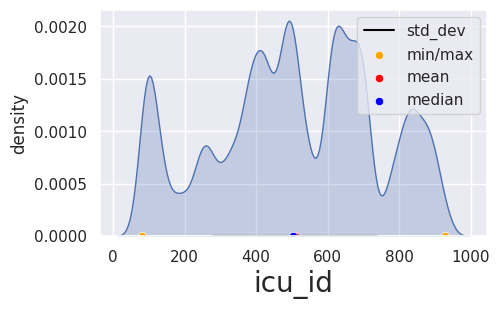

In [129]:
UVA_numeric(df7, continuous_feature_with_int)

i val----- h1_hemaglobin_max
j val----- 0
i val----- h1_hemaglobin_min
j val----- 1
i val----- h1_sodium_min
j val----- 2
i val----- h1_sodium_max
j val----- 3
i val----- h1_potassium_min
j val----- 4
i val----- h1_potassium_max
j val----- 5
i val----- fio2_apache
j val----- 6
i val----- ph_apache
j val----- 7
i val----- paco2_apache
j val----- 8
i val----- pao2_apache
j val----- 9
i val----- paco2_for_ph_apache
j val----- 10
i val----- d1_lactate_max
j val----- 11
i val----- d1_lactate_min
j val----- 12
i val----- d1_diasbp_invasive_max
j val----- 13
i val----- d1_diasbp_invasive_min
j val----- 14
i val----- d1_sysbp_invasive_min
j val----- 15
i val----- d1_sysbp_invasive_max
j val----- 16
i val----- d1_mbp_invasive_max
j val----- 17
i val----- d1_mbp_invasive_min
j val----- 18
i val----- d1_pao2fio2ratio_min
j val----- 19
i val----- d1_pao2fio2ratio_max
j val----- 20
i val----- d1_arterial_ph_max
j val----- 21
i val----- d1_arterial_ph_min
j val----- 22
i val----- d1_arterial_pco2_mi

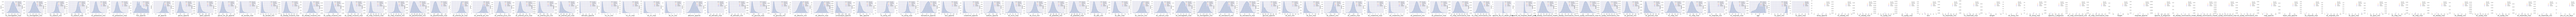

In [130]:
UVA_numeric(df7, continuous_feature_with_float)

In [131]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

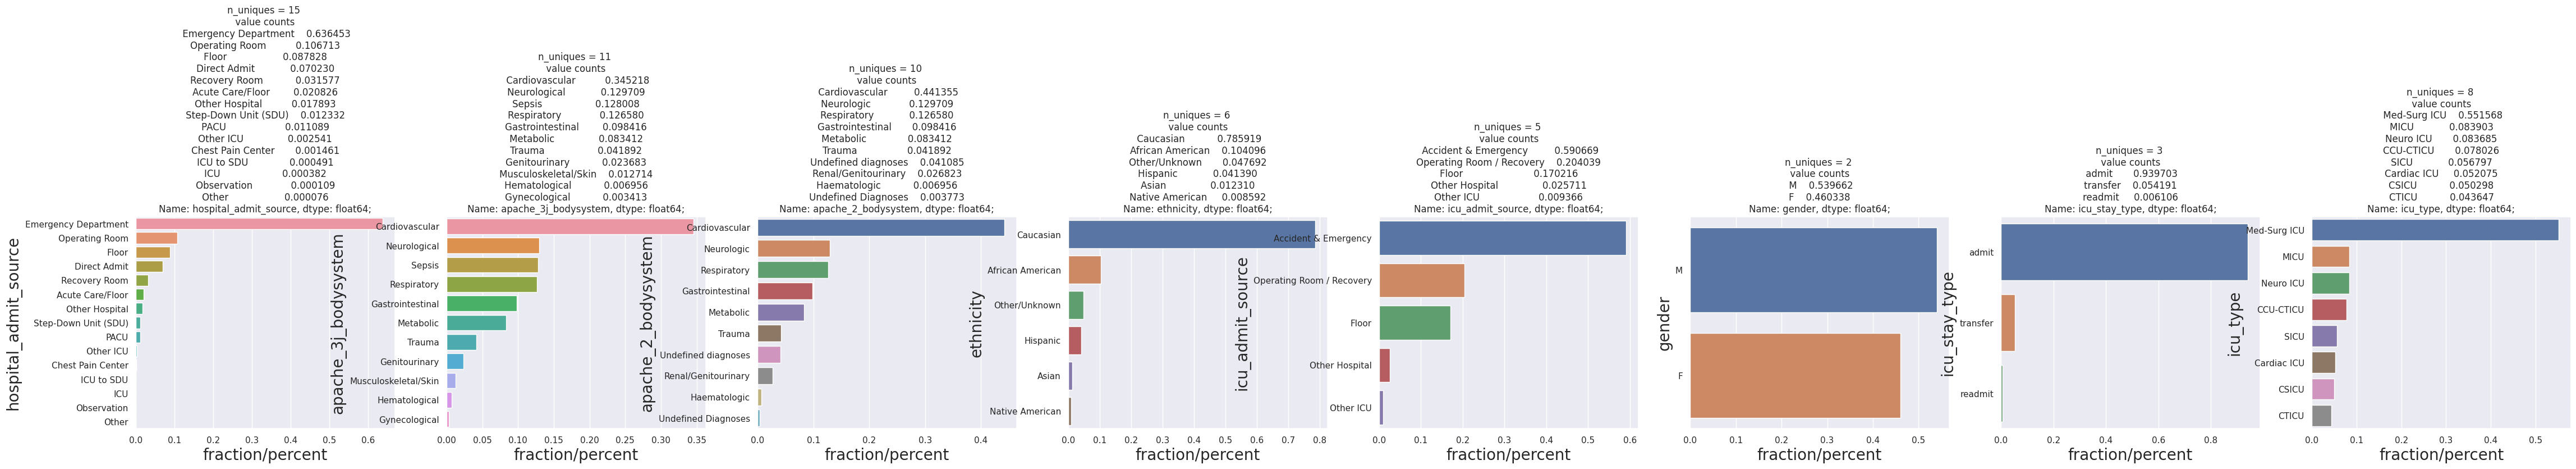

In [132]:
# Custom function for easy visualisation of Categorical Variables
UVA_category(df7, categorical_feature_with_obj)

#Lets analyze outliers

In [133]:
# checking out liers
#lets analyze outliers
# Outliers detection 
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))

      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


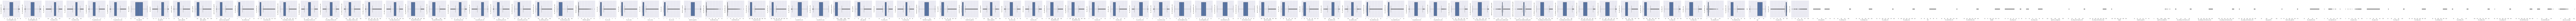

In [134]:
UVA_outlier(df7, continuous_feature_with_float,)

True


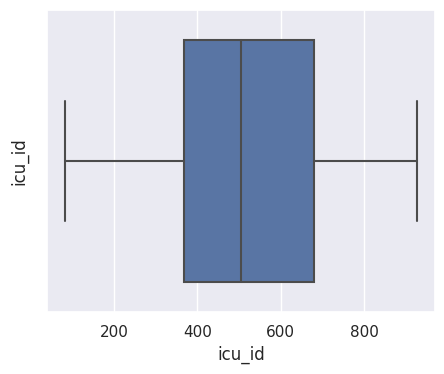

In [135]:
UVA_outlier(df7, continuous_feature_with_int,)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


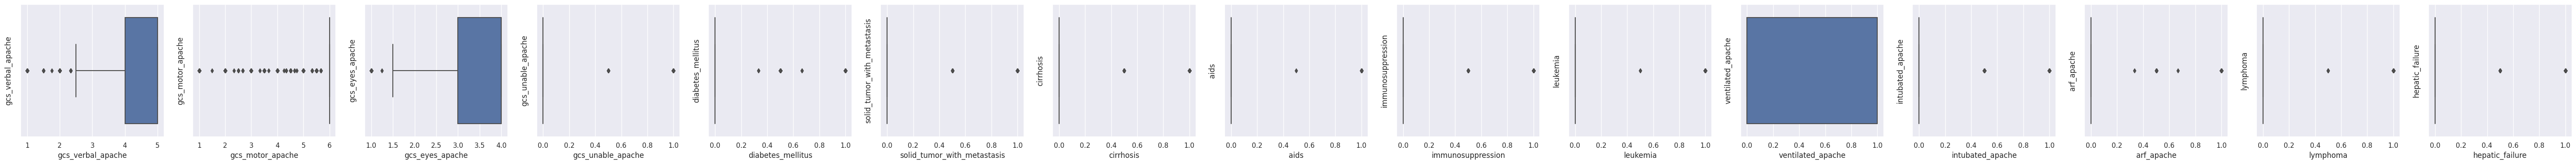

In [136]:
UVA_outlier(df7, discrete_feature_with_float,)

True
True
True
True


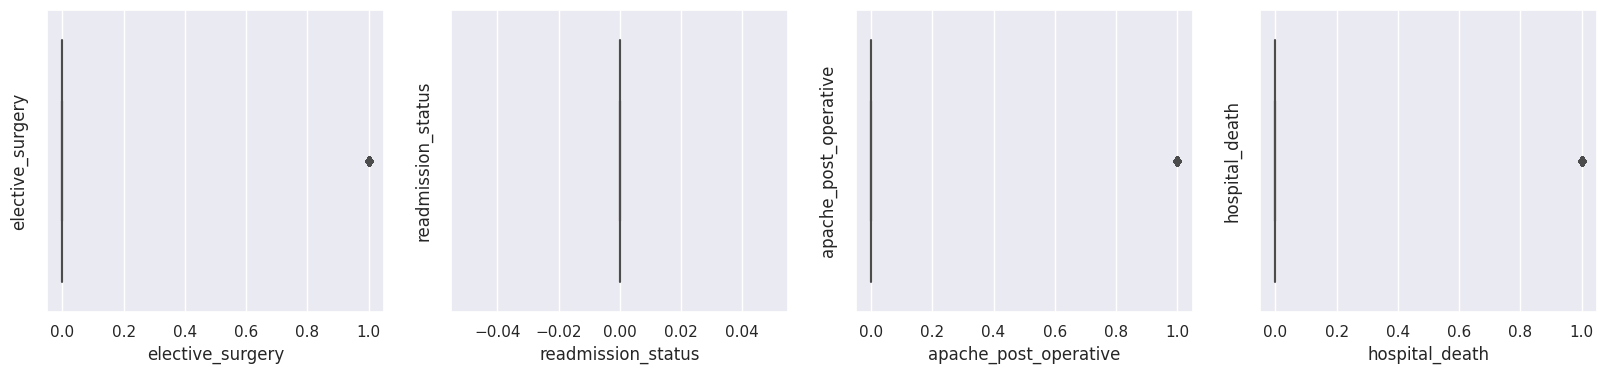

In [137]:
UVA_outlier(df7, discrete_feature_with_int,)

In [138]:
def cap_data(df7):
    for col in df7.columns:
        print("capping the ",col)
        if (((df7[col].dtype)=='float64') | ((df7[col].dtype)=='int64')):
            percentiles = df7[col].quantile([0.01,0.99]).values
            df7[col][df7[col] <= percentiles[0]] = percentiles[0]
            df7[col][df7[col] >= percentiles[1]] = percentiles[1]
        else:
            df7[col]=df7[col]
    return df7

final_df=cap_data(df7)

capping the  h1_hemaglobin_max
capping the  h1_hemaglobin_min
capping the  h1_sodium_min
capping the  h1_sodium_max
capping the  h1_potassium_min
capping the  h1_potassium_max
capping the  fio2_apache
capping the  ph_apache
capping the  paco2_apache
capping the  pao2_apache
capping the  paco2_for_ph_apache
capping the  d1_lactate_max
capping the  d1_lactate_min
capping the  d1_diasbp_invasive_max
capping the  d1_diasbp_invasive_min
capping the  d1_sysbp_invasive_min
capping the  d1_sysbp_invasive_max
capping the  d1_mbp_invasive_max
capping the  d1_mbp_invasive_min
capping the  d1_pao2fio2ratio_min
capping the  d1_pao2fio2ratio_max
capping the  d1_arterial_ph_max
capping the  d1_arterial_ph_min
capping the  d1_arterial_pco2_min
capping the  d1_arterial_pco2_max
capping the  d1_arterial_po2_min
capping the  d1_arterial_po2_max
capping the  bilirubin_apache
capping the  h1_inr_min
capping the  h1_inr_max
capping the  d1_inr_max
capping the  d1_inr_min
capping the  albumin_apache
capping 

In [139]:
final_data = final_df.copy()

In [140]:
final_data.shape

(91713, 149)

#**Feature Encoding**

In [141]:
#Categorical Encoding
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
final_df['gender']= label_encoder.fit_transform(final_df['gender'])
 
final_df['gender'].unique()

array([1, 0])

In [142]:
# One Hot encode
# Get one hot encoding of columns B
one_hot = pd.get_dummies(final_df['icu_stay_type'])

In [143]:
type(one_hot)

pandas.core.frame.DataFrame

In [144]:
# Drop column B as it is now encoded
final_df = final_df.drop('icu_stay_type',axis = 1)

In [145]:
# Join the encoded df
final_df = final_df.join(one_hot)

In [146]:
# Get one hot encoding of columns B
one_hot1 = pd.get_dummies(final_df['icu_admit_source'])
# Drop column B as it is now encoded
final_df = final_df.drop('icu_admit_source',axis = 1)
# Join the encoded df
final_df = final_df.join(one_hot1)

In [147]:
final_df.shape

(91713, 155)

In [148]:
categorical_features2=[feature for feature in final_df.columns if final_df[feature].dtypes=='O']

In [149]:
final_df[categorical_features2].head()

,hospital_admit_source,apache_3j_bodysystem,apache_2_bodysystem,ethnicity,icu_type
0,Floor,Sepsis,Cardiovascular,Caucasian,CTICU
1,Floor,Respiratory,Respiratory,Caucasian,Med-Surg ICU
2,Emergency Department,Metabolic,Metabolic,Caucasian,Med-Surg ICU
3,Operating Room,Cardiovascular,Cardiovascular,Caucasian,CTICU
4,Emergency Department,Trauma,Trauma,Caucasian,Med-Surg ICU


In [150]:
# Frequency encode
# frequency encode
df_frq_map=final_df['ethnicity'].value_counts().to_dict() 
final_df['ethnicity'] = final_df['ethnicity'].map(df_frq_map)

In [151]:
df_frq_map=final_df['hospital_admit_source'].value_counts().to_dict() 
final_df['hospital_admit_source'] = final_df['hospital_admit_source'].map(df_frq_map)

In [152]:
df_frq_map=final_df['icu_type'].value_counts().to_dict() 
final_df['icu_type'] = final_df['icu_type'].map(df_frq_map)

In [153]:
df_frq_map=final_df['apache_3j_bodysystem'].value_counts().to_dict() 
final_df['apache_3j_bodysystem'] = final_df['apache_3j_bodysystem'].map(df_frq_map)

In [154]:
df_frq_map=final_df['apache_2_bodysystem'].value_counts().to_dict() 
final_df['apache_2_bodysystem'] = final_df['apache_2_bodysystem'].map(df_frq_map)

In [155]:
print("List of Object values",list(final_df.select_dtypes(['object']).columns))

List of Object values []


In [156]:
final_df.head()

,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hospital_admit_source,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_3j_bodysystem,apache_2_bodysystem,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,ethnicity,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,gender,elective_surgery,pre_icu_los_days,icu_id,icu_type,readmission_status,apache_post_operative,hospital_death,admit,readmit,transfer,Accident & Emergency,Floor,Operating Room / Recovery,Other Hospital,Other ICU
0,11.30,11.30,145.0,145.0,4.2,4.2,1.000000,7.45,37.000000,51.0,37.000000,1.300000,1.000000,46.000000,32.000000,64.000000,122.0,66.000000,40.000000,55.000000,81.926667,7.450000,7.450000,37.000000,37.0,51.000000,56.0,0.400,1.3,1.30,1.30,1.3,2.30,0.400000,0.400000,145.0,143.0,2.300000,2.300000,680.3136,14.10,37.50,38.90,8055,27.40,31.0,2.5100,134.0,19.0,15.00,233.0,233.00,14.10,14.10,7.4,8.50,8.90,8.90,27.40,27.40,168.0,30.0,31.0,134.0,136.0,2.51,2.2300,3.40,4.00,86.0,85.0,0.050,0.100,68.0,63.0,131.0,115.0,109.0,168.0,85.0,86.0,18.0,26.0,68.0,74.0,100.0,39.3,63.0,68.0,115.0,131.0,22.73,108.0,119.0,73.90,37.2,39.5,4.0,6.0,3.0,11740,40478,113.0,46.0,89.0,72079,180.3,36.0,502.01,37.0,68.0,0.0,131.0,73.0,40.0,118.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,10.0,100.0,74.0,46.0,89.0,68.0,37.0,131.0,73.0,119.0,72.0,1,0,0.541667,92,4003,0,0,0,1,0,0,0,1,0,0,0
1,11.30,11.30,145.0,145.0,4.2,4.2,1.000000,7.45,37.000000,51.0,37.000000,3.500000,3.500000,51.333333,31.333333,68.666667,136.0,74.666667,44.000000,55.000000,81.926667,7.450000,7.450000,37.000000,37.0,51.000000,56.0,0.375,1.3,1.30,1.30,1.3,2.35,0.500000,0.500000,145.0,143.0,1.600000,1.600000,680.3136,12.70,36.30,36.30,8055,36.90,9.0,0.5600,145.0,27.0,26.00,477.0,497.97,12.70,23.30,8.0,8.60,11.30,11.10,36.10,36.90,145.0,9.0,11.0,145.0,145.0,0.71,0.5600,3.80,4.20,85.0,57.0,0.290,0.470,61.0,48.0,95.0,71.0,128.0,145.0,57.0,85.0,28.0,31.0,77.0,72.0,95.0,35.1,48.0,61.0,71.0,95.0,27.42,100.0,114.0,70.20,35.1,36.3,1.0,3.0,1.0,11609,11609,108.0,38.0,120.0,72079,160.0,33.0,2

In [157]:
#Lets drop Id's
# LETS DROP READMISSION STATUS 
final_df.drop('readmission_status',inplace=True,axis=1)

final_df.drop('icu_id',inplace=True,axis=1)

In [158]:
final_df.shape

(91713, 153)

#**Train and Test Split**

In [159]:
# Spliting data train and test 
X= final_df.drop(['hospital_death'],axis=1)
y=final_df['hospital_death']

In [160]:
type(X)

pandas.core.frame.DataFrame

In [161]:
type(y)

pandas.core.series.Series

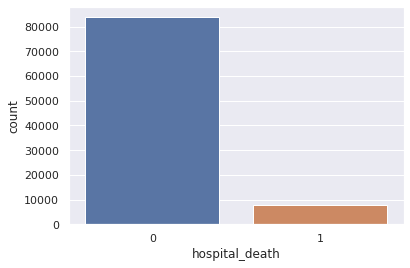

In [162]:
sns.countplot(final_df['hospital_death'])

In [163]:
final_df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

#Its imbalanced dataset

**class(0)- 83798**

**class(1)- 7915**

#Splitting the data into Train and Validation set

In [164]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=11, stratify = y)

In [165]:
type(xtrain)

pandas.core.frame.DataFrame

#Machine learning Alorithm part

**Logistics regression**